## Cats and Dogs

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import time
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split

In [2]:
Directory = 'dataset/train/'
CATEGORIES = ['cats', 'dogs']

In [3]:
IMG_SIZE = 100

data = []

In [4]:
for categories in CATEGORIES:
    folder = os.path.join(Directory, categories)
    label = CATEGORIES.index(categories)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [5]:
len(data)

25000

In [6]:
random.shuffle(data)

In [7]:
data[0]

[array([[[224, 224, 224],
         [222, 222, 222],
         [225, 225, 225],
         ...,
         [ 16,  10,  11],
         [ 20,  14,  15],
         [ 19,  13,  14]],
 
        [[254, 254, 254],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [ 27,  20,  21],
         [ 18,  12,  13],
         [ 19,  13,  14]],
 
        [[230, 230, 230],
         [230, 230, 230],
         [234, 234, 234],
         ...,
         [ 20,  14,  15],
         [ 16,  10,  11],
         [ 20,  14,  15]],
 
        ...,
 
        [[141,  92,  60],
         [141,  92,  60],
         [143,  94,  62],
         ...,
         [135,  88,  60],
         [135,  87,  63],
         [135,  90,  56]],
 
        [[144,  95,  63],
         [137,  87,  57],
         [145,  95,  66],
         ...,
         [133,  87,  56],
         [136,  90,  60],
         [131,  86,  53]],
 
        [[146,  97,  65],
         [147,  97,  66],
         [145,  95,  68],
         ...,
         [129,  84,  51],
  

In [8]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
len(X)

25000

In [11]:
len(y)

25000

In [12]:
X = X/255.0

In [13]:
X.shape

(25000, 100, 100, 3)

In [14]:
y.shape

(25000,)

In [23]:
PATH = f'predictions - {int(time.time())}'

In [24]:
tensorboard = TensorBoard(log_dir=f'dataset/logs//{PATH}//')

### CNN Model 1 

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu, input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu, input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, input_shape=(100,100,3), activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation = tf.keras.activations.softmax)
])

In [26]:
model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [27]:
model.fit(X, y, epochs=5, validation_split=0.2, batch_size = 32, callbacks=[tensorboard])

Epoch 1/5
625/625 [==============================] - 339s 530ms/step - loss: 0.6299 - accuracy: 0.6377 - val_loss: 0.5442 - val_accuracy: 0.7320
Epoch 2/5
625/625 [==============================] - 318s 508ms/step - loss: 0.5098 - accuracy: 0.7498 - val_loss: 0.4887 - val_accuracy: 0.7616
Epoch 3/5
625/625 [==============================] - 299s 478ms/step - loss: 0.4217 - accuracy: 0.8056 - val_loss: 0.4958 - val_accuracy: 0.7664
Epoch 4/5
625/625 [==============================] - 302s 483ms/step - loss: 0.3373 - accuracy: 0.8492 - val_loss: 0.4558 - val_accuracy: 0.7914
Epoch 5/5
625/625 [==============================] - 282s 451ms/step - loss: 0.2271 - accuracy: 0.9047 - val_loss: 0.4857 - val_accuracy: 0.7914


### CNN Model 2

In [33]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu, input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu, input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu, input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, input_shape = (100,100,3), activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(128, input_shape = (100,100,3), activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation = tf.keras.activations.softmax)
])

In [34]:
model_2.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [35]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)             

In [36]:
model_2.fit(X, y, epochs=7, validation_split=0.2, batch_size = 32, callbacks=[tensorboard])

Epoch 1/7
625/625 [==============================] - 363s 574ms/step - loss: 0.6280 - accuracy: 0.6384 - val_loss: 0.5846 - val_accuracy: 0.6786
Epoch 2/7
625/625 [==============================] - 477s 762ms/step - loss: 0.4916 - accuracy: 0.7614 - val_loss: 0.4154 - val_accuracy: 0.8062
Epoch 3/7
625/625 [==============================] - 434s 694ms/step - loss: 0.4092 - accuracy: 0.8145 - val_loss: 0.3985 - val_accuracy: 0.8228
Epoch 4/7
625/625 [==============================] - 679s 1s/step - loss: 0.3446 - accuracy: 0.8457 - val_loss: 0.4005 - val_accuracy: 0.8128
Epoch 5/7
625/625 [==============================] - 655s 1s/step - loss: 0.2903 - accuracy: 0.8728 - val_loss: 0.3480 - val_accuracy: 0.8444
Epoch 6/7
625/625 [==============================] - 485s 776ms/step - loss: 0.2294 - accuracy: 0.9047 - val_loss: 0.3928 - val_accuracy: 0.8458
Epoch 7/7
625/625 [==============================] - 316s 506ms/step - loss: 0.1673 - accuracy: 0.9320 - val_loss: 0.4492 - val_accuracy

### --> ACCURACY

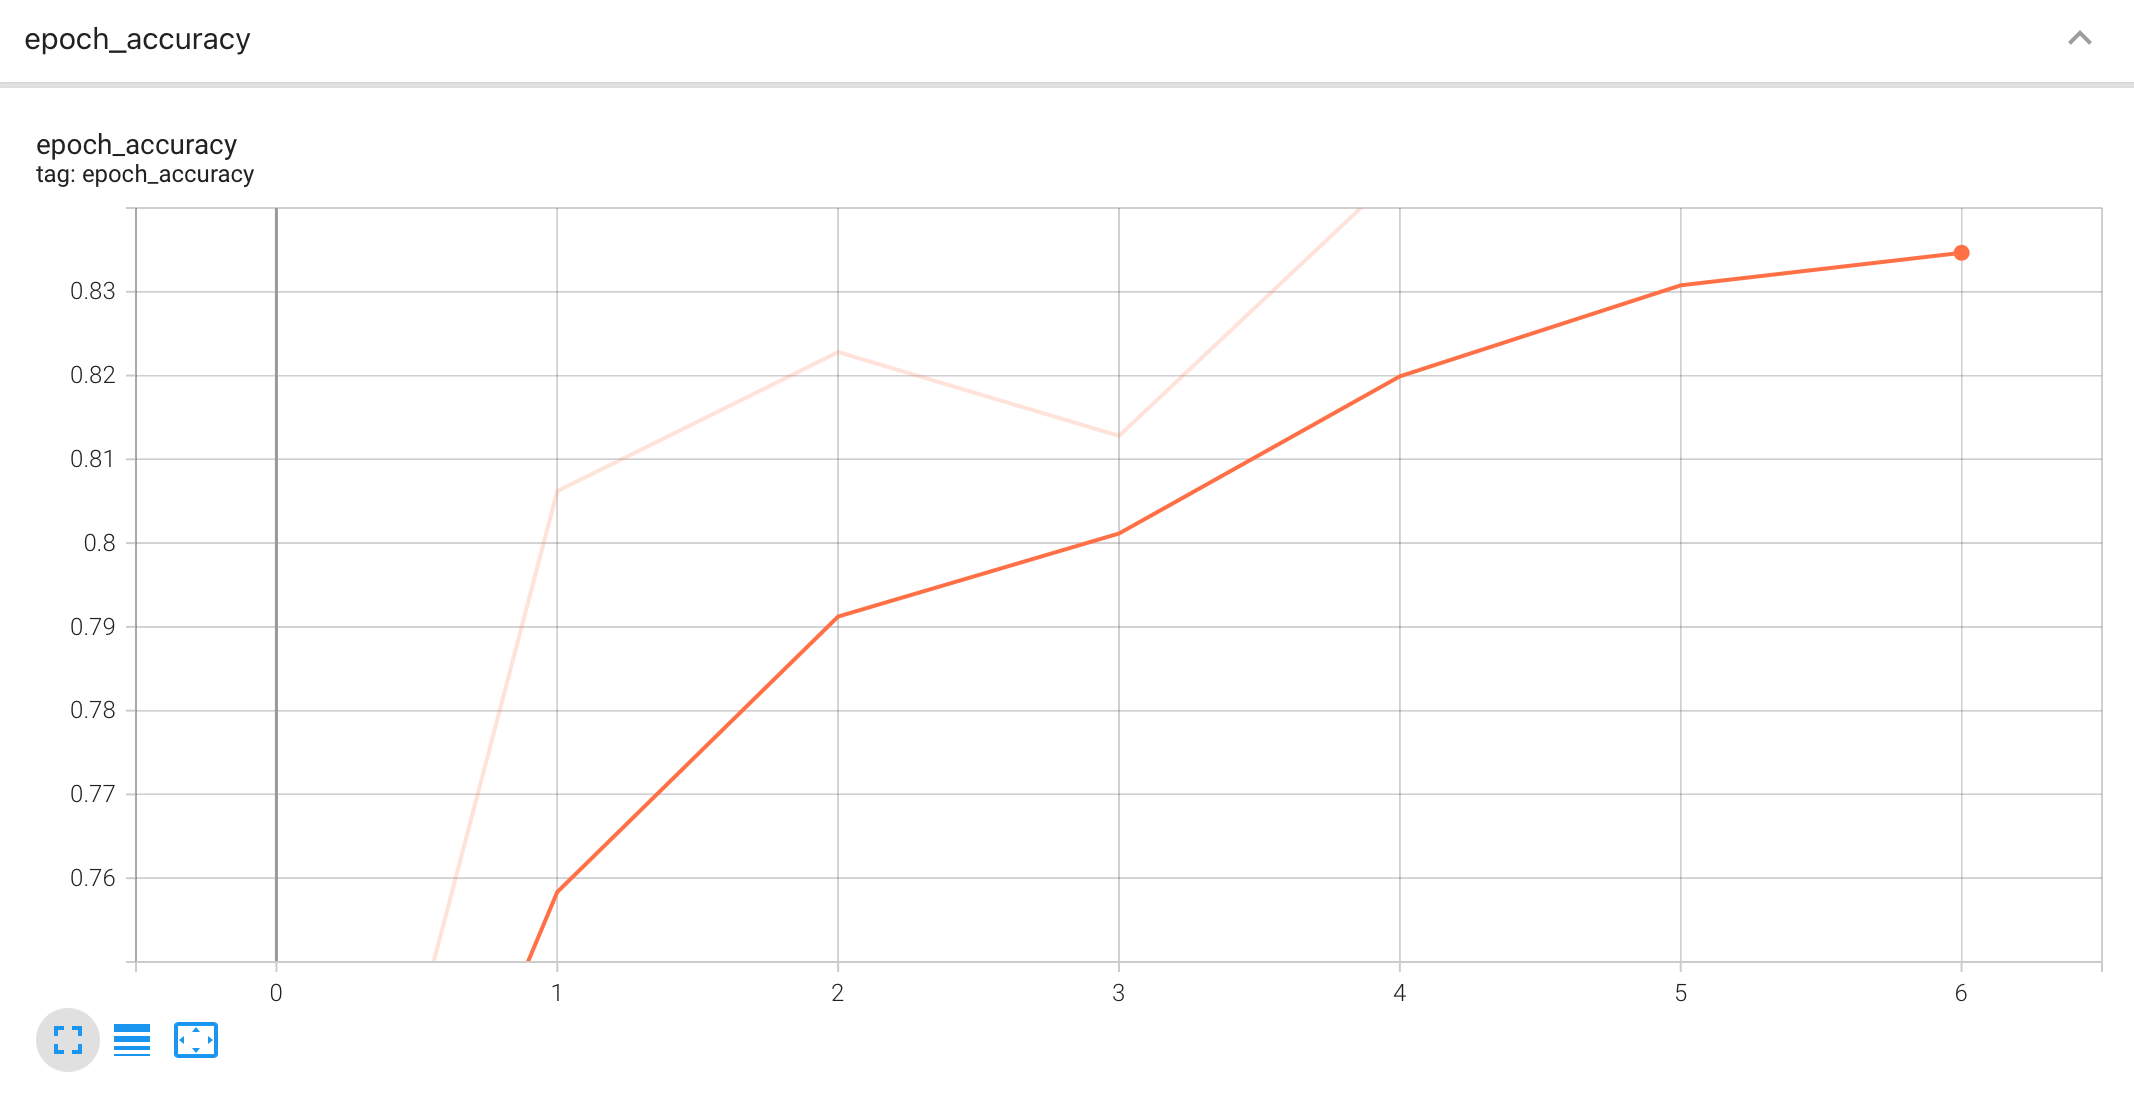

### --> LOSS

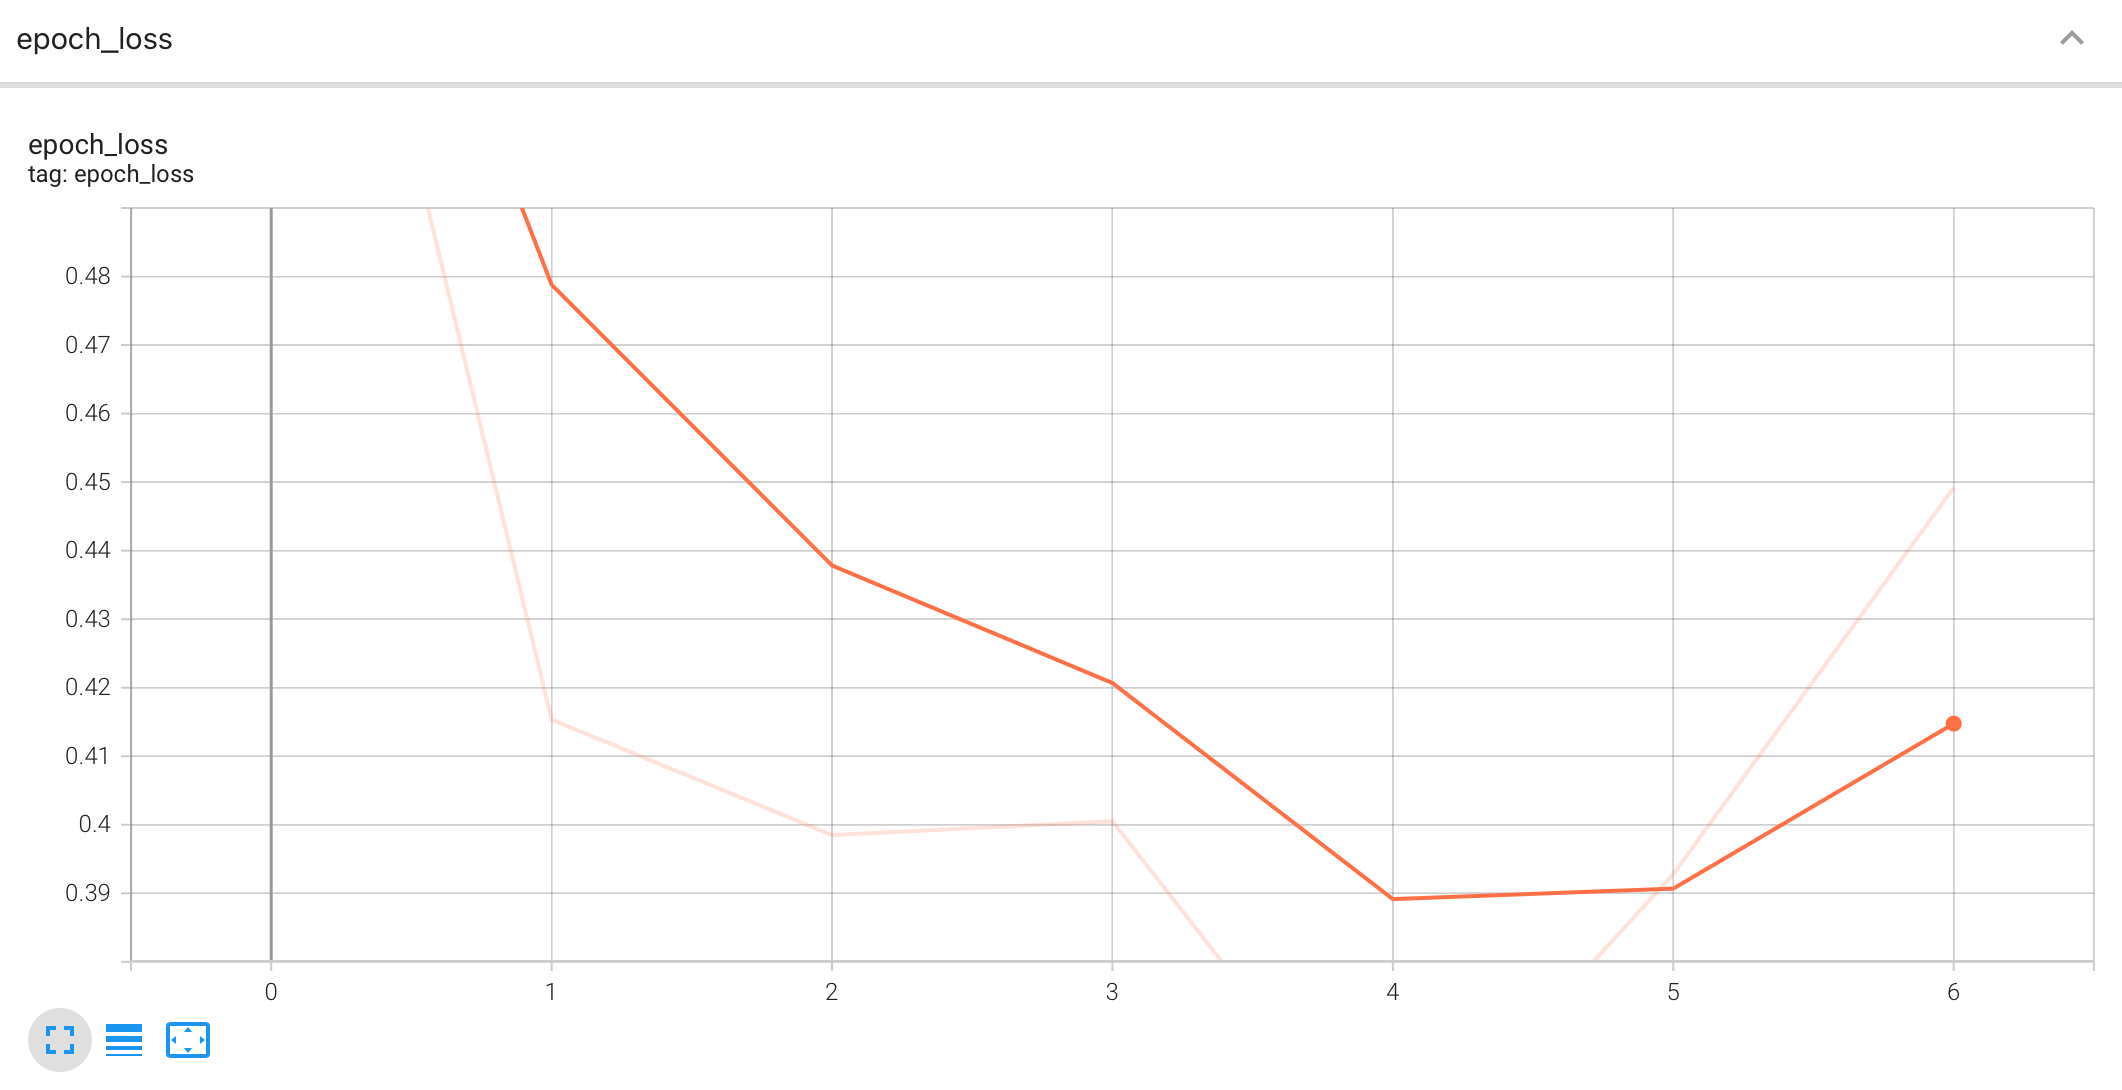

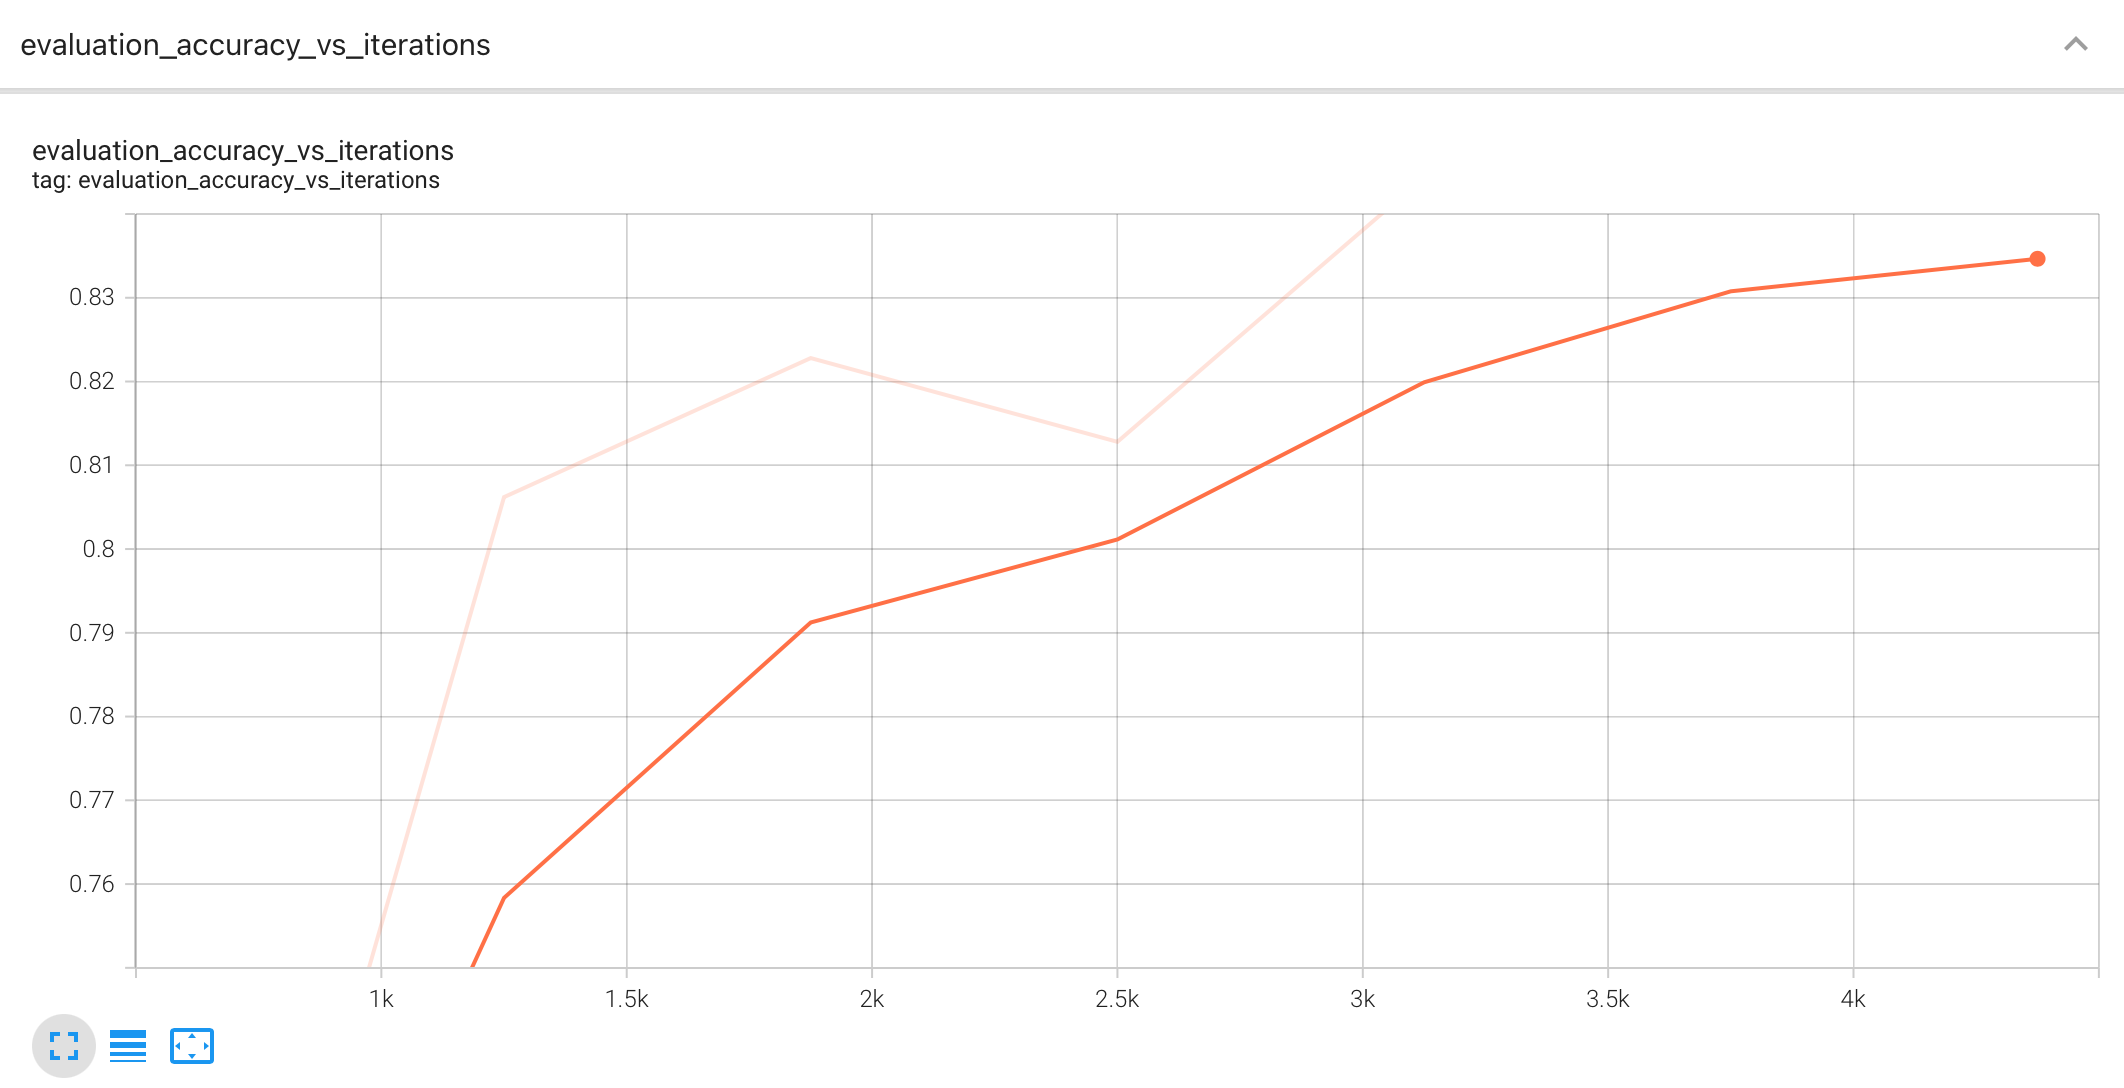

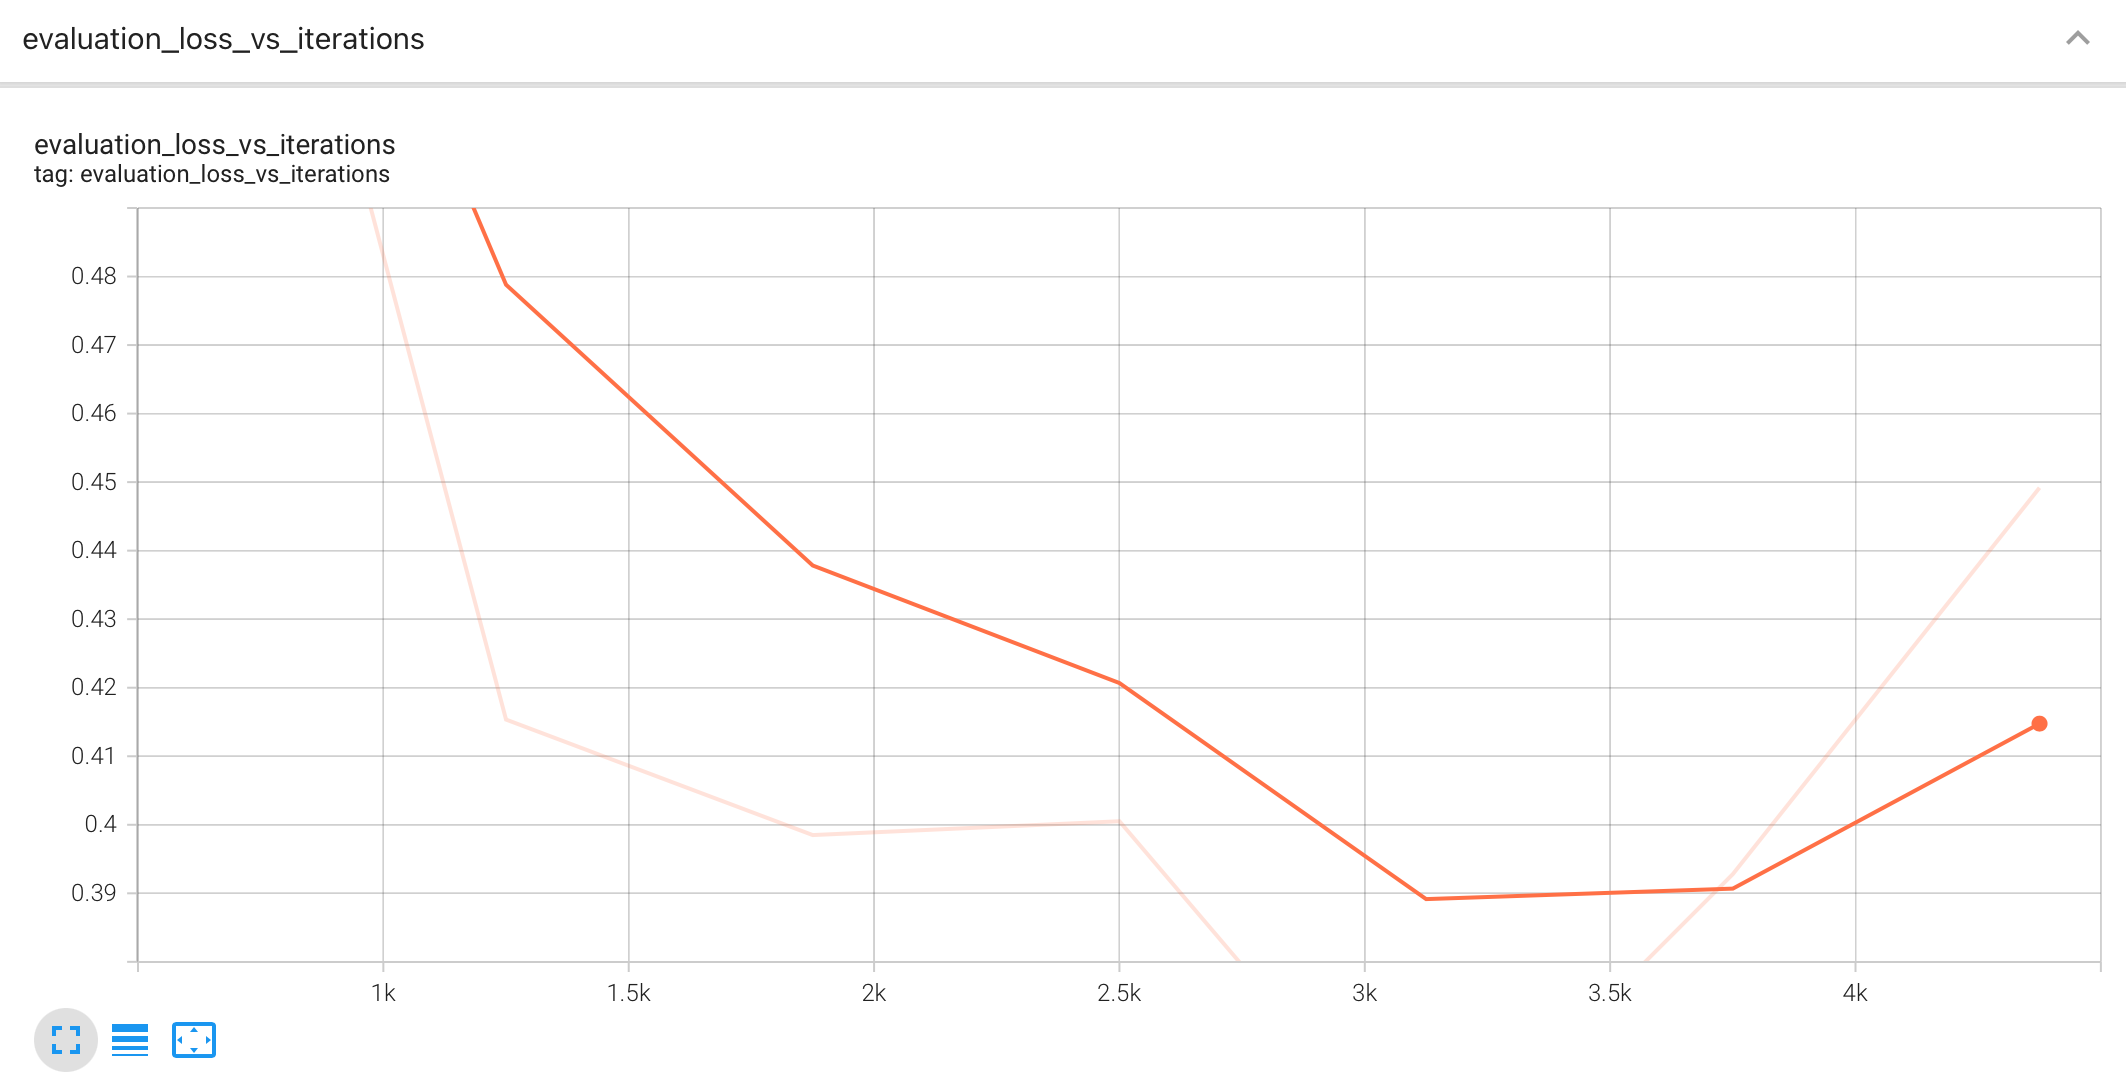

## Pre - trained model

In [9]:
local_weights_file = 'inception_v3_weights.h5'
print(type(local_weights_file))
print(" ")
print(local_weights_file)

<class 'str'>
 
inception_v3_weights.h5


In [10]:
pre_trained_model = InceptionV3(input_shape = (100, 100, 3), 
                                include_top = False, 
                                weights = None)

In [11]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
orig_weights = pre_trained_model.get_weights()

In [13]:
len(pre_trained_model.layers)

311

In [14]:
pre_trained_model.load_weights(local_weights_file)

In [15]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [16]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [17]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense  (1, activation='sigmoid')(x)

In [18]:
model_icv3 = Model(pre_trained_model.input, x) 

In [25]:
model_icv3.compile(optimizer = RMSprop(learning_rate=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model_icv3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [2]:
filenames = os.listdir("train")
labels = [x.split(".")[0] for x in filenames]
data = pd.DataFrame({"filename": filenames, "label": labels})

In [4]:
train_data, test_val_data = train_test_split(data, test_size=0.20, random_state=42)
validation_data, test_data = train_test_split(test_val_data, test_size=0.20, random_state=42)

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
train_generator = train_datagen.flow_from_dataframe(train_data,
                                                    directory='train',
                                                    x_col='filename',
                                                    y_col='label',
                                                    target_size = (100, 100),                                            
                                                    class_mode = 'categorical', 
                                                    batch_size = 32)

Found 20000 validated image filenames belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [7]:
validation_generator =  test_datagen.flow_from_dataframe(validation_data,
                                                         directory='train',
                                                         x_col='filename',
                                                         y_col='label',
                                                         target_size = (100, 100),                                            
                                                         class_mode = 'categorical', 
                                                         batch_size = 32)

Found 4000 validated image filenames belonging to 2 classes.


In [23]:
history = model_icv3.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 2)

Epoch 1/10
100/100 - 59s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
100/100 - 64s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/10
100/100 - 63s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
100/100 - 62s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/10
100/100 - 62s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/10
100/100 - 67s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/10
100/100 - 62s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/10
100/100 - 62s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 9/10
100/100 - 61s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 10/10
100/100 - 62s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000


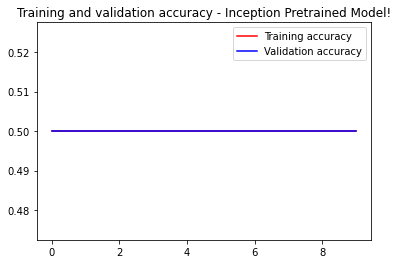

<Figure size 432x288 with 0 Axes>

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - Inception Pretrained Model!')
plt.legend(loc=0)
plt.figure()


plt.show()